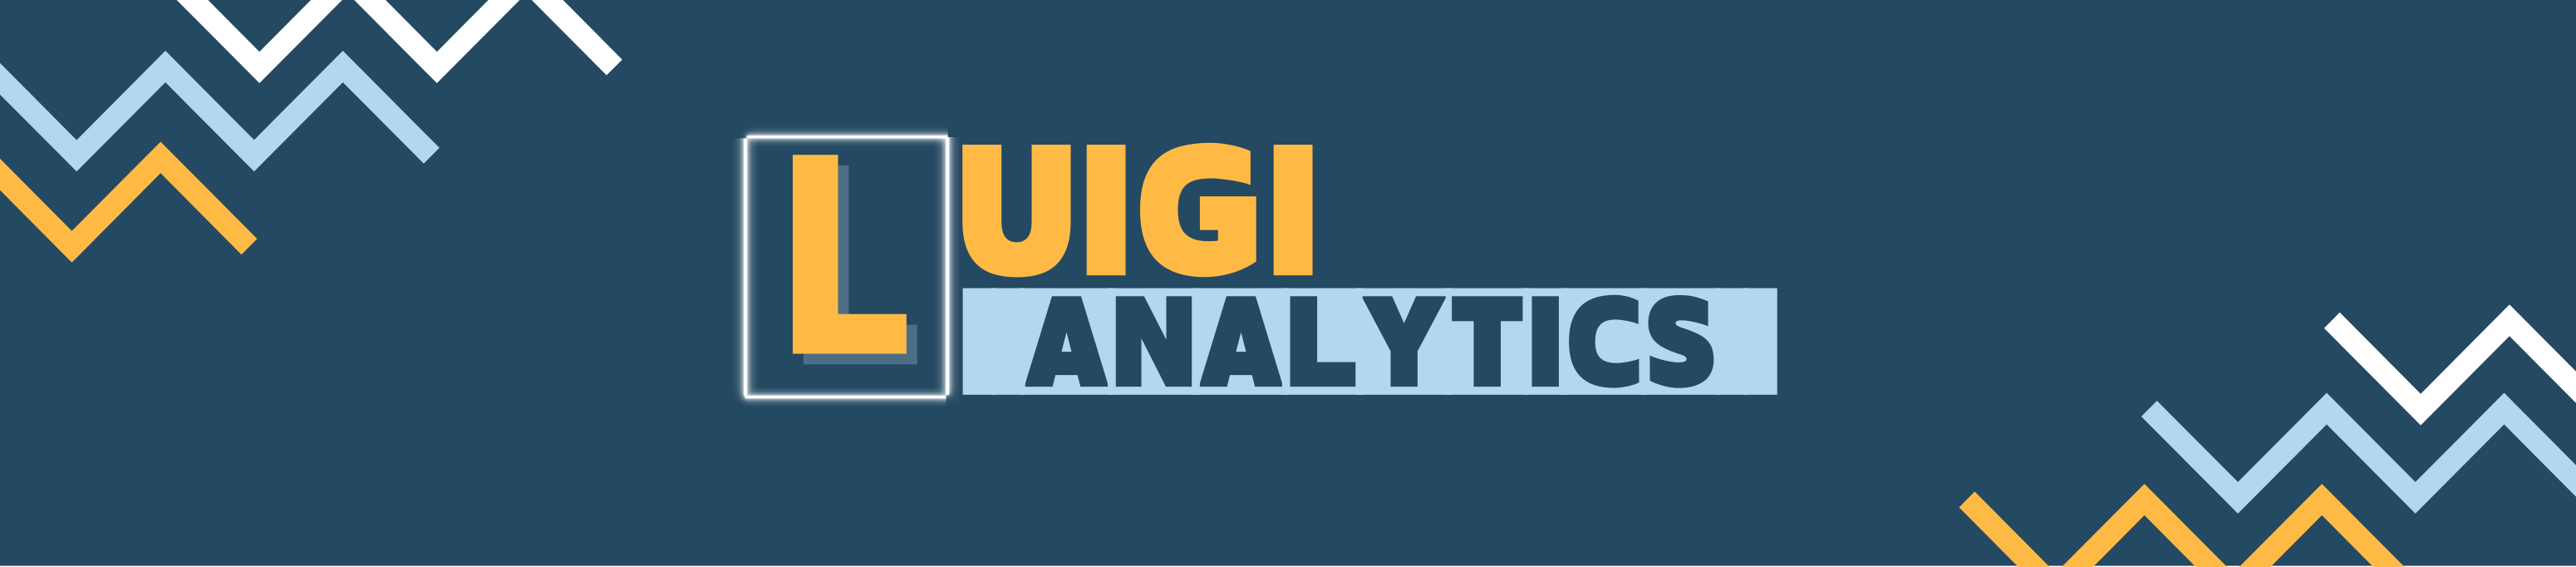

# ANÁLISIS EXPLORATORIO | SALARIOS 

In [2]:
# Librerías básicas a importar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pandas-profiling
#!pip install ydata-profiling
from ydata_profiling import ProfileReport


In [3]:
# Leer el csv --> Modificar el directorio en base a donde tenés descargado el archivo
df = pd.read_csv('../Luigi/salario_data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
# Sin limites de visualización de columnas
pd.set_option('display.max_columns', None)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

## PREGUNTAS DISPARADORAS


##### DISCLAIMER: 
El definir las preguntas disparadoras te va a permitir filtrar las columnas que vas a utilizar para realizar el análisis exploratorio, y de esta manera no tener que trabajar con la totalidad de features del dataset al momento de analizarlo. Es totalmente flexible y dependerá de cada análisis: incluso con un mismo dataset se pueden proponer miles de caminos para llevar a cabo el EDA!

Te invito a que propongas nuevas preguntas para continuar el análisis por tu cuenta una vez que termines el tutorial.

-------------
En este tutorial nos vamos a focalizar en responder lo siguiente:

- Cuáles son los roles mejor pagos en promedio? Esto cambió durante la pandemia (2020 a 2021)?

- En qué rol hay más cantidad de personas trabajando? Evolucionó durante covid?

- Hay diferencia de salario entre hombres y mujeres en la industria tech?

- Qué empresas tienen más empleados?

- Qué empresas pagan más? Existe diferencia de salario entre FAANG y otras empresas?

- Evaluar correlación: educación-salario, años de experiencia-salario, etnia-salario, dmaid

In [6]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'gender', 'Race',
       'Education'],
      dtype='object')

In [5]:
# Nos quedamos con las siguientes columnas

df = df[["timestamp", 'company', "level", 'title', 'totalyearlycompensation','location',\
         'yearsofexperience', 'yearsatcompany', 'gender','Race',\
         'Education']]

df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN


In [7]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany
count,6.264200e+04,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093
std,1.380337e+05,5.840375,3.263656
min,1.000000e+04,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000
50%,1.880000e+05,6.000000,2.000000
75%,2.640000e+05,10.000000,4.000000
max,4.980000e+06,69.000000,69.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62642.0,216300.373647,138033.746377,10000.0,135000.0,188000.0,264000.0,4980000.0
yearsofexperience,62642.0,7.204135,5.840375,0.0,3.0,6.0,10.0,69.0
yearsatcompany,62642.0,2.702093,3.263656,0.0,0.0,2.0,4.0,69.0


In [9]:
df.describe(include='O').T

,count,unique,top,freq
timestamp,62642,62561,2/25/2020 13:25:07,3
company,62637,1631,Amazon,8126
level,62523,2923,L4,5014
title,62642,15,Software Engineer,41231
location,62642,1050,"Seattle, WA",8701
gender,43102,4,Male,35702
Race,22427,5,Asian,11772
Education,30370,5,Master's Degree,15391


### INSIGHTS DEL ANÁLISIS BREVE DE ESTADÍSTICOS:

En base a las métricas observadas anteriormente se puede intuir lo siguiente:

- Tenemos variables con valores nulos.

- Posibles duplicados.

- Años de experiencia incluyen personas que recién comienzan a trabajar (0 años de experiencia) pero vemos un valor outlier con 69 años. Personalmente considero imposible que una persona esté trabajando hace 69 años. A investigar.

- Lo mismo ocurre con años en la empresa. Altamente probable que sea un outlier. A investigar.

- La ubicación está definida por el siguiente schema: Ciudad, Estado (si es de EEUU). Pero si es extranjero entonces sigue la lógica: ciudad, código, país. 

- Alta cardinalidad en la empresa, vemos que la que más se repite es Amazon.

- Investigar la variable de género que existen (por lo general suelen ser 3: H/F/Otros)

- Investigar la variable de raza y educación. 

- Solucionar el problema de las fechas

In [10]:
perfil = ProfileReport(df, title="Reporte de Pandas")
perfil.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# PREPARACIÓN DEL DATOS

## TRATAMIENTO DEL AÑO

Objetivo: Transformar mi timestamp en únicamente año porque evaluaré la evolución YoY (Year over Year)

In [11]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN


In [12]:
df['timestamp'].dtype

dtype('O')

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtype

dtype('<M8[ns]')

In [14]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN


In [15]:
df["timestamp"] = df["timestamp"].dt.year
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,2017,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,2017,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,2017,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,2017,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,2017,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN


In [16]:
df.rename(columns={'timestamp':'year'}, inplace=True)
df.head()

,year,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,2017,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,2017,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,2017,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,2017,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,2017,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN


## TRATAMIENTO DE UBICACIÓN/LOCACIÓN

Objetivo: Como hemos observado al inicio tenemos un problema en cuanto schema de losd atos. En EEUU se expresa como ciudad, estado. Para otros países como ciudad, estado, país. Por lo que buscaré extraer la ciudad y el país para continuar el análisis por ubicación geográfica.

In [17]:
df['location'].value_counts()[:20]

Seattle, WA                   8701
San Francisco, CA             6797
New York, NY                  4562
Redmond, WA                   2649
Mountain View, CA             2275
Sunnyvale, CA                 2248
San Jose, CA                  2047
Austin, TX                    1527
Menlo Park, CA                1440
Cupertino, CA                 1431
Bangalore, KA, India          1199
Santa Clara, CA               1196
Boston, MA                    1190
Palo Alto, CA                 1146
London, EN, United Kingdom    1024
San Diego, CA                  839
Chicago, IL                    806
Toronto, ON, Canada            742
Bellevue, WA                   737
Los Angeles, CA                714
Name: location, dtype: int64

In [18]:
df_loc = df['location'].str.split(', ', expand=True, n=2)
df_loc.head(20)

,0,1,2
0,Redwood City,CA,None
1,San Francisco,CA,None
2,Seattle,WA,None
3,Sunnyvale,CA,None
4,Mountain View,CA,None
5,Seattle,WA,None
6,Redmond,WA,None
7,Seattle,WA,None
8,Redmond,WA,None
9,Seattle,WA,None


In [19]:
df_loc[2].fillna("United States", inplace=True)
df_loc.head(20)

,0,1,2
0,Redwood City,CA,United States
1,San Francisco,CA,United States
2,Seattle,WA,United States
3,Sunnyvale,CA,United States
4,Mountain View,CA,United States
5,Seattle,WA,United States
6,Redmond,WA,United States
7,Seattle,WA,United States
8,Redmond,WA,United States
9,Seattle,WA,United States


In [20]:
df = df.assign(city=df_loc[0], country=df_loc[2])
df.drop(columns='location', inplace=True)
df.head()

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,NaN,NaN,Redwood City,United States
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,NaN,NaN,San Francisco,United States
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,NaN,NaN,Seattle,United States
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,NaN,NaN,Sunnyvale,United States
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,NaN,NaN,Mountain View,United States


## CREAR UN FLAG PARA EMPRESAS FAANG

Objetivo: Poder identificar aquellas empresas que sean FAANG (Facebook, Apple, Amazon, Netflix, Google) del resto de empresas para analizar diferencias posteriormente. La finalidad es flaggear con un booleano 0-1.

In [21]:
faang = ['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
df['es_faang'] = df['company'].isin(faang).astype(int)
df


,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,NaN,NaN,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,NaN,NaN,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,NaN,NaN,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,NaN,NaN,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,NaN,NaN,Mountain View,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018,Google,T4,Software Engineer,327000,10.0,1.0,NaN,NaN,NaN,Seattle,United States,1
62638,2018,Microsoft,62,Software Engineer,237000,2.0,2.0,NaN,NaN,NaN,Redmond,United States,0
62639,2018,MSFT,63,Software Engineer,220000,14.0,12.0,NaN,NaN,NaN,Seattle,United States,0
62640,2018,Salesforce,Lead MTS,Software Engineer,280000,8.0,4.0,NaN,NaN,NaN,San Francisco,United States,0


In [22]:
df['es_faang'] = df['company'].str.capitalize().isin(faang).astype(int)
df

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,NaN,NaN,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,NaN,NaN,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,NaN,NaN,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,NaN,NaN,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,NaN,NaN,Mountain View,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018,Google,T4,Software Engineer,327000,10.0,1.0,NaN,NaN,NaN,Seattle,United States,1
62638,2018,Microsoft,62,Software Engineer,237000,2.0,2.0,NaN,NaN,NaN,Redmond,United States,0
62639,2018,MSFT,63,Software Engineer,220000,14.0,12.0,NaN,NaN,NaN,Seattle,United States,0
62640,2018,Salesforce,Lead MTS,Software Engineer,280000,8.0,4.0,NaN,NaN,NaN,San Francisco,United States,0


## TRATAMIENTO DE VALORES NULOS

In [23]:
cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['company', 'level', 'title', 'gender', 'Race', 'Education', 'city', 'country']

In [24]:
num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['year',
 'totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'es_faang']

In [25]:
for feature in cat_features:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}\
    \n{df[feature].value_counts()}\
    \n \n------------------------\n")

La variable COMPANY tiene categorias: 1631    
Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64    
 
------------------------

La variable LEVEL tiene categorias: 2923    
L4                             5014
L5                             4871
L3                             3337
L6                             2871
Senior Software Engineer       1443
                               ... 
Mid Market                        1
Gr 7                              1
Senior BA                         1
Consulting Analyst                1
Bioinformatics Scientist II       1
Name: level, Length: 2923, dtype: int64    
 
------------------------

La 

In [26]:
df.isnull().mean().sort_values(ascending=False)

Race                       0.641981
Education                  0.515182
gender                     0.311931
level                      0.001900
company                    0.000080
year                       0.000000
title                      0.000000
totalyearlycompensation    0.000000
yearsofexperience          0.000000
yearsatcompany             0.000000
city                       0.000000
country                    0.000000
es_faang                   0.000000
dtype: float64

In [27]:
df.dropna(subset=['company', 'level'], inplace=True)
df.isnull().mean().sort_values(ascending=False)

Race                       0.642167
Education                  0.515228
gender                     0.311750
year                       0.000000
company                    0.000000
level                      0.000000
title                      0.000000
totalyearlycompensation    0.000000
yearsofexperience          0.000000
yearsatcompany             0.000000
city                       0.000000
country                    0.000000
es_faang                   0.000000
dtype: float64

In [28]:
df= df.fillna({'Race':'Desconocido', 'Education':'Desconocido', 'gender':'Desconocido'})
df.head()

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,Desconocido,Desconocido,Desconocido,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,Desconocido,Desconocido,Desconocido,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,Desconocido,Desconocido,Desconocido,Mountain View,United States,0


In [29]:
df.isnull().mean().sort_values(ascending=False)

year                       0.0
company                    0.0
level                      0.0
title                      0.0
totalyearlycompensation    0.0
yearsofexperience          0.0
yearsatcompany             0.0
gender                     0.0
Race                       0.0
Education                  0.0
city                       0.0
country                    0.0
es_faang                   0.0
dtype: float64

## TRATAMIENTO DE VALORES EXTREMOS - OUTLIERS

In [31]:
df['yearsofexperience'].nlargest(20)

46988    69.0
39957    45.0
9515     42.0
9615     42.0
10963    41.0
11020    41.0
7084     40.0
16718    40.0
17341    40.0
20559    40.0
29279    40.0
32300    40.0
33160    40.0
46930    40.0
49239    40.0
51436    40.0
56289    40.0
57609    40.0
7670     39.0
29528    39.0
Name: yearsofexperience, dtype: float64

In [32]:
df = df[df['yearsofexperience']<=50]
df

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,Desconocido,Desconocido,Desconocido,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,Desconocido,Desconocido,Desconocido,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,Desconocido,Desconocido,Desconocido,Mountain View,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018,Google,T4,Software Engineer,327000,10.0,1.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
62638,2018,Microsoft,62,Software Engineer,237000,2.0,2.0,Desconocido,Desconocido,Desconocido,Redmond,United States,0
62639,2018,MSFT,63,Software Engineer,220000,14.0,12.0,Desconocido,Desconocido,Desconocido,Seattle,United States,0
62640,2018,Salesforce,Lead MTS,Software Engineer,280000,8.0,4.0,Desconocido,Desconocido,Desconocido,San Francisco,United States,0


In [33]:
df['yearsofexperience'].nlargest(20)

39957    45.0
9515     42.0
9615     42.0
10963    41.0
11020    41.0
7084     40.0
16718    40.0
17341    40.0
20559    40.0
29279    40.0
32300    40.0
33160    40.0
46930    40.0
49239    40.0
51436    40.0
56289    40.0
57609    40.0
7670     39.0
29528    39.0
40423    39.0
Name: yearsofexperience, dtype: float64

### DISCLAIMER: 

Por lo general se recurre al sentido común/conocimiento de la industria para limpiar outliers. Pero independientemente de eso, también puede optar por el approach de rango intercuartil. 

Eliminar outliers con el rango intercuartil (IQR) multiplicado por 1.5 es una técnica comúnmente utilizada para limpiar datos contaminados por valores extremos.

El rango intercuartil es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), y representa el rango que abarca el 50% central de los datos. Multiplicando el IQR por 1.5, se obtiene un rango más amplio que abarca valores ligeramente atípicos.

El proceso para eliminar outliers usando el rango intercuartil 1.5 generalmente se realiza de la siguiente manera:

1. Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) del conjunto de datos.
2. Calcular el IQR como la diferencia entre Q3 y Q1: IQR = Q3 - Q1.
3. Calcular los límites inferior y superior para detectar outliers:
4. Límite inferior = Q1 - 1.5 * IQR
5. Límite superior = Q3 + 1.5 * IQR

Identificar los valores que estén por debajo del límite inferior o por encima del límite superior como outliers.
Eliminar o tratar los valores atípicos según sea necesario para limpiar el conjunto de datos.

Es importante tener en cuenta que el valor 1.5 es una elección común, pero se puede ajustar según el grado de tolerancia deseado para considerar un valor como outlier. El método del rango intercuartil 1.5 es una herramienta útil y rápida para limpiar datos y mejorar la calidad del análisis y los modelos estadísticos.


-----------

## CUANTO \$ COBRAN LOS DIFERENTES ROLES?

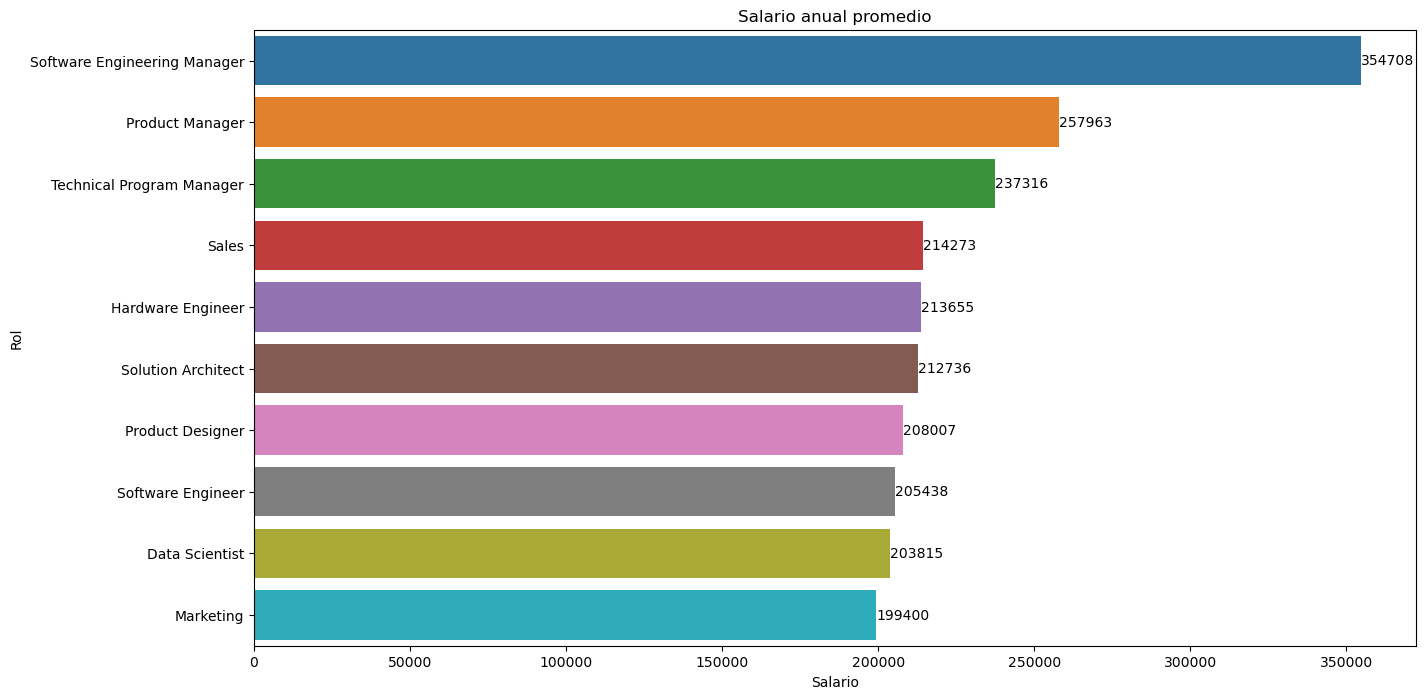

In [38]:
# Salario promedio de los 10 roles más importantes
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df.groupby('title')['totalyearlycompensation'].mean().nlargest(10).reset_index(),
                 x='totalyearlycompensation',
                 y = 'title')

ax.set(xlabel='Salario', ylabel='Rol', title = 'Salario anual promedio')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [39]:
df.groupby('title')['totalyearlycompensation'].mean().nlargest(10).reset_index()

,title,totalyearlycompensation
0,Software Engineering Manager,354707.912458
1,Product Manager,257962.644912
2,Technical Program Manager,237315.674891
3,Sales,214273.318872
4,Hardware Engineer,213655.000000
5,Solution Architect,212736.387208
6,Product Designer,208007.294430
7,Software Engineer,205437.764320
8,Data Scientist,203814.541213
9,Marketing,199400.000000


In [40]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [41]:
years = [2020, 2021]

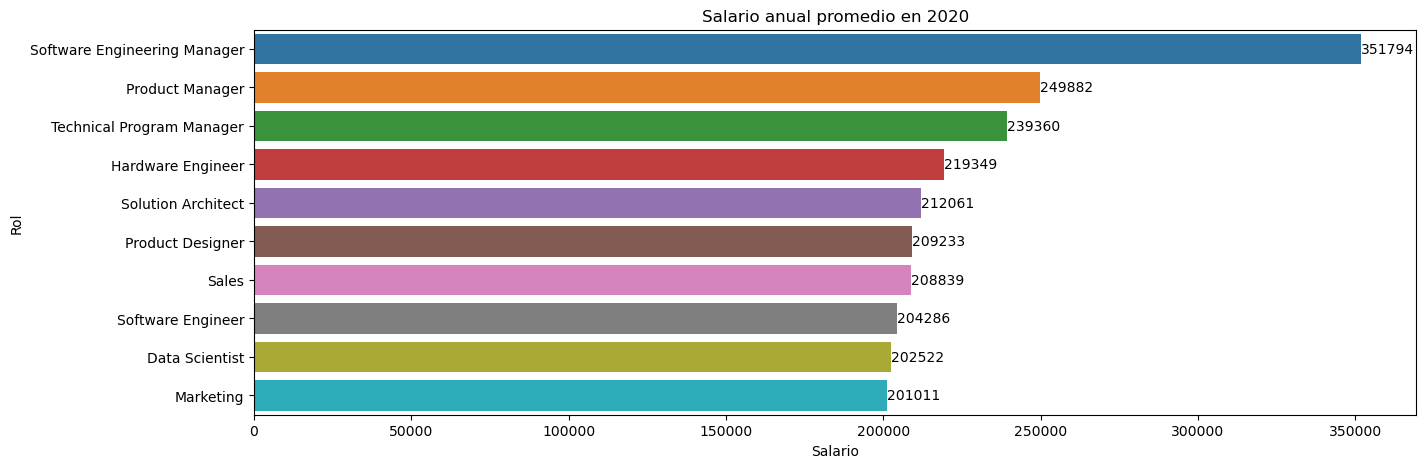

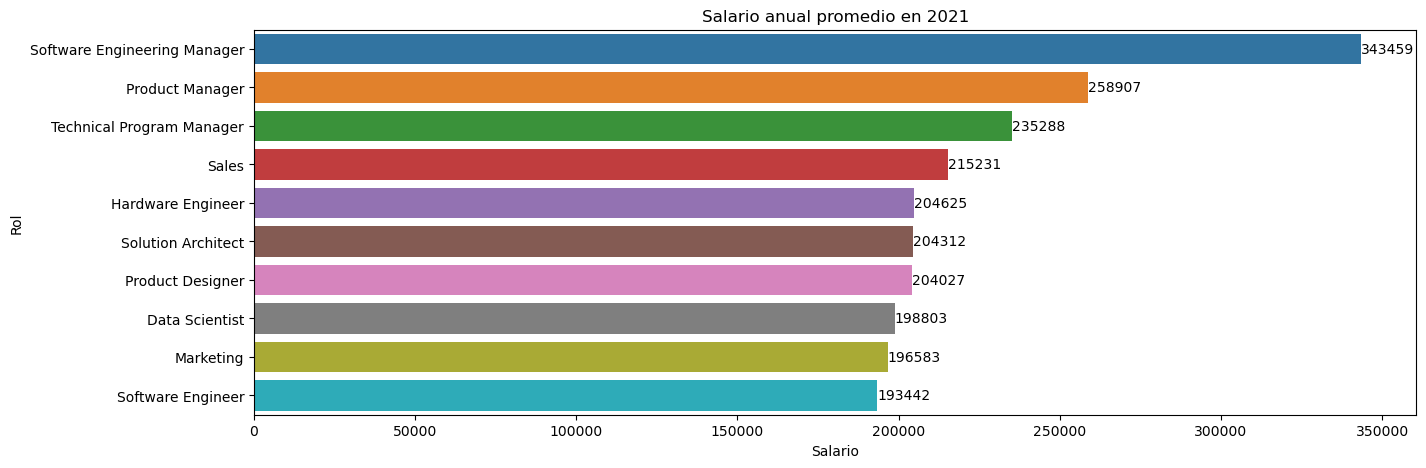

In [42]:
for year in years:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['year']==year].groupby('title')['totalyearlycompensation'].mean().nlargest(10).values,
                    y = df[df['year']==year].groupby("title")['totalyearlycompensation'].mean().nlargest(10).index
    )
    ax.set(xlabel='Salario', ylabel='Rol', title = f'Salario anual promedio en {year}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout
    plt.show()

----------

# EMPLEADOS POR ROL

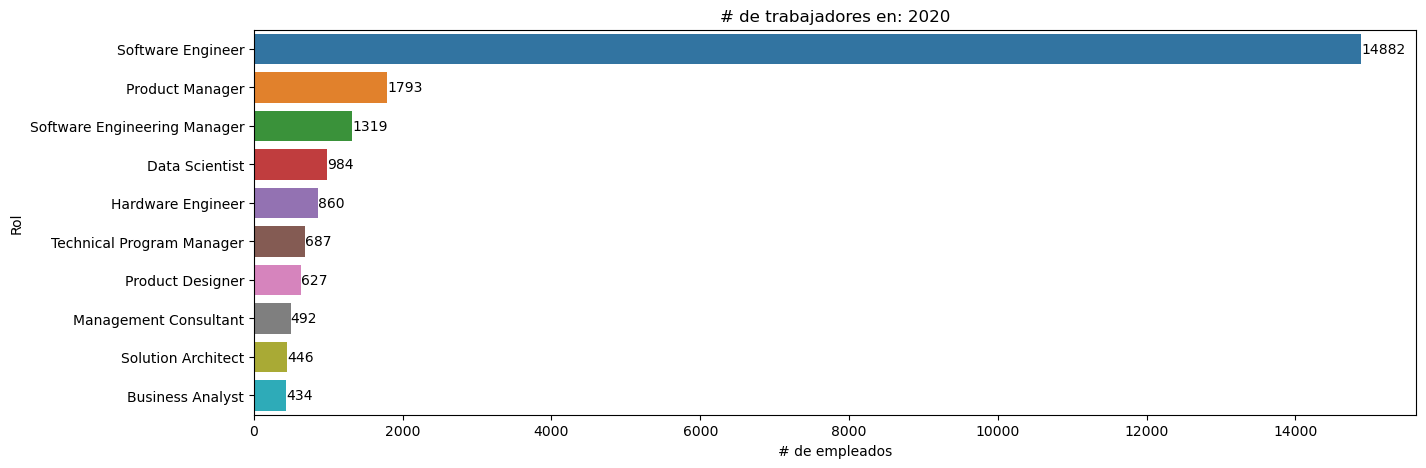

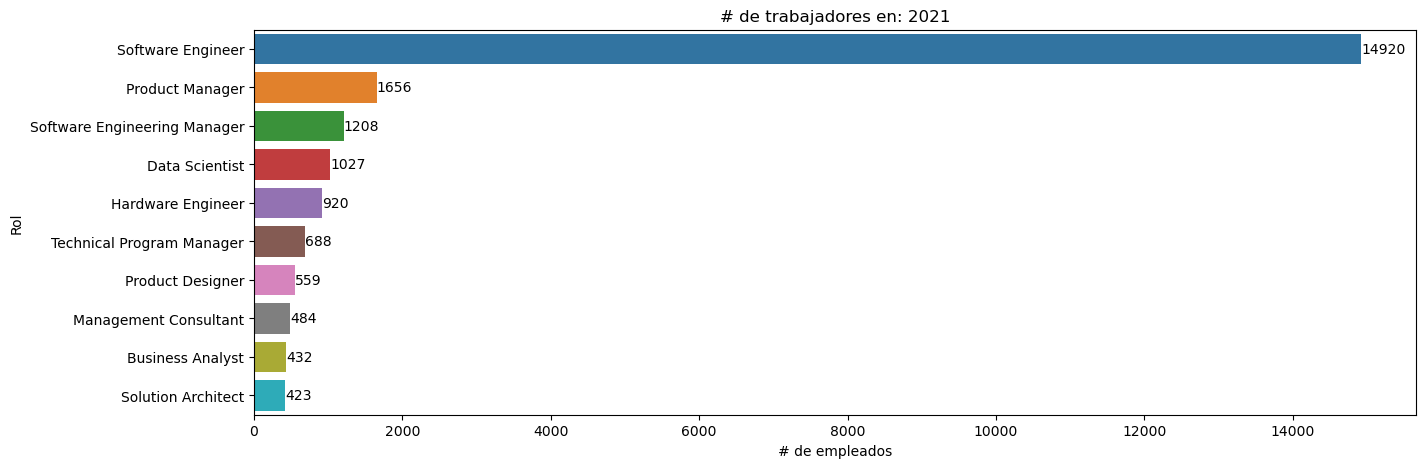

In [43]:
for year in years:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['year']==year]['title'].value_counts().nlargest(10).values,
                    y = df[df['year']==year]["title"].value_counts().nlargest(10).index
    )
    ax.set(xlabel='# de empleados', ylabel='Rol', title = f'# de trabajadores en: {year}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout

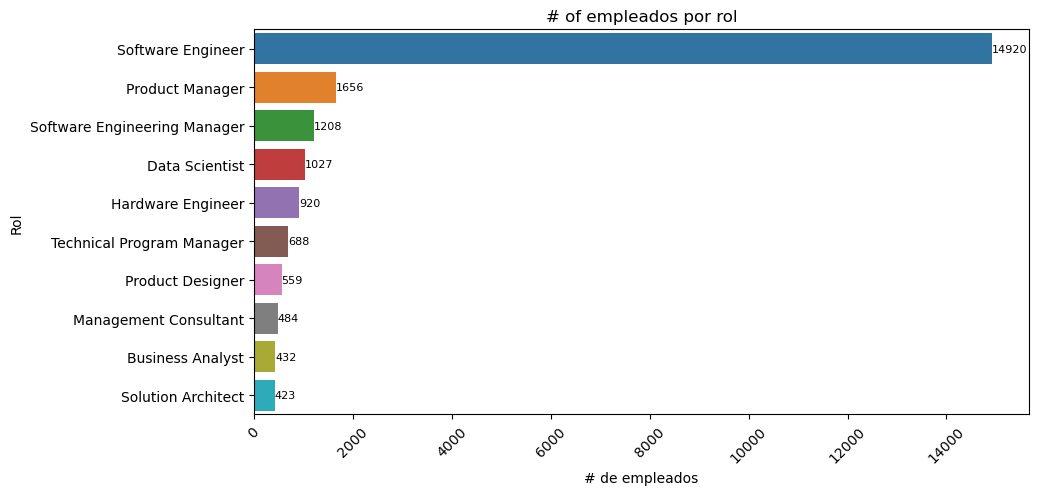

In [44]:
# Se puede lograr lo mismo con un countplot --> No hay una única forma
filter_df = df[df['year']==2021]

order = filter_df['title'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=filter_df, y='title', order=order)
plt.title('# of empleados por rol')
plt.xlabel('# de empleados')
plt.ylabel('Rol')
plt.bar_label(ax.containers[0], size=8)
plt.xticks(rotation=45)
plt.show()

----------
# GAP SALARIO ENTRE HOMBRES Y MUJERES

In [45]:
df['gender'].value_counts()

Male                               35645
Desconocido                        19489
Female                              6985
Other                                397
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [46]:
df = df[df['gender']!='Title: Senior Software Engineer']
df['gender'].value_counts()

Male           35645
Desconocido    19489
Female          6985
Other            397
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='totalyearlycompensation'>

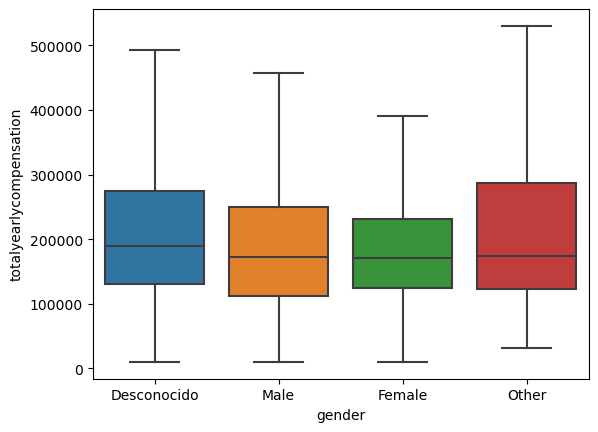

In [47]:
uno_df = df[df['year']==2021]

sns.boxplot(data=uno_df,
           x='gender',
           y='totalyearlycompensation',
           showfliers=False)

--------
# POR EDUCACIÓN

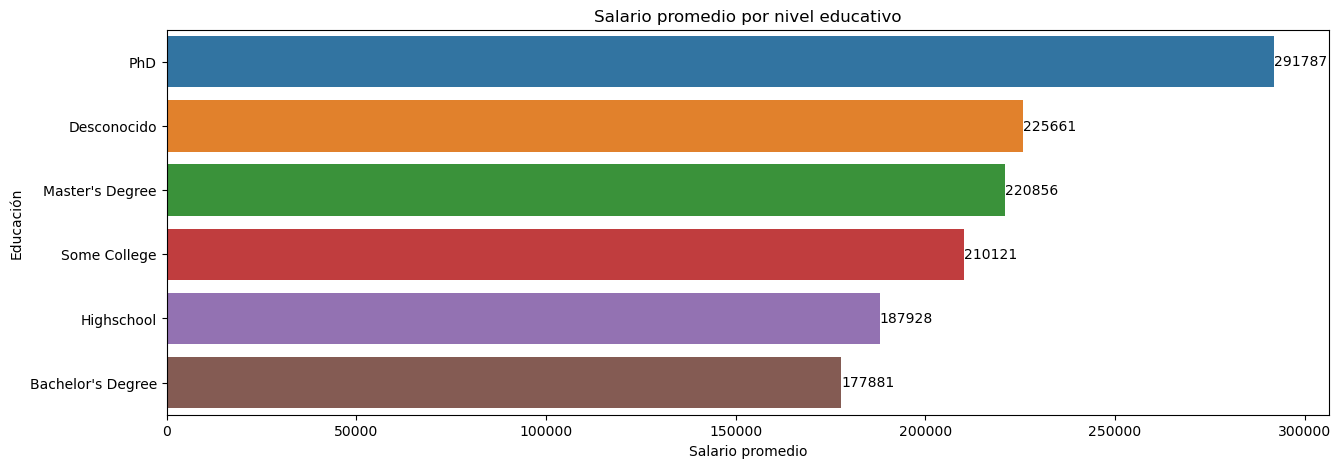

In [48]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=df.groupby('Education')['totalyearlycompensation'].mean().sort_values(ascending=False).values,
            y=df.groupby('Education')['totalyearlycompensation'].mean().sort_values(ascending=False).index)

ax.set(xlabel='Salario promedio', ylabel='Educación', title = 'Salario promedio por nivel educativo')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

------
# ANÁLISIS POR PAÍS

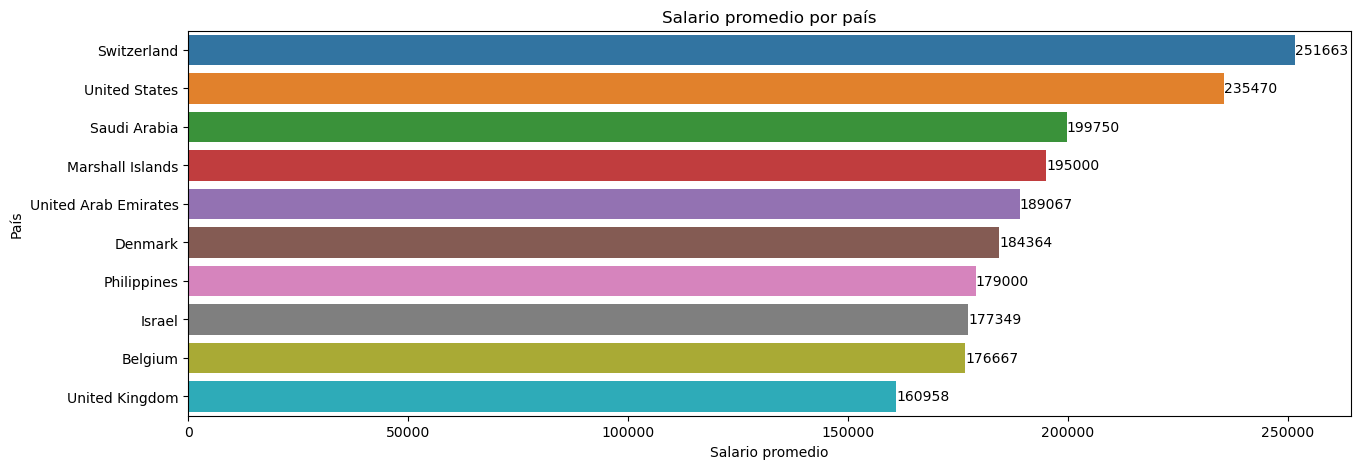

In [50]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=df.groupby('country')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).values,
            y=df.groupby('country')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).index)

ax.set(xlabel='Salario promedio', ylabel='País', title = 'Salario promedio por país')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

------
# ANÁLISIS BASADO EN FAANGS

In [51]:
# Vamos a comparar los diferentes cargos senior entre FAANGS en USA

senior_df = df[(df['yearsofexperience']>5) & (df['country']=='United States')]
senior_df

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education,city,country,es_faang
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States,1
5,2017,Microsoft,63,Software Engineer,208000,8.5,8.5,Desconocido,Desconocido,Desconocido,Seattle,United States,0
6,2017,Microsoft,65,Software Engineering Manager,300000,15.0,11.0,Desconocido,Desconocido,Desconocido,Redmond,United States,0
9,2017,Microsoft,63,Software Engineer,201000,12.0,6.0,Desconocido,Desconocido,Desconocido,Seattle,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,2018,Qualcomm,Staff Engineer,Software Engineer,185000,8.0,8.0,Desconocido,Desconocido,Desconocido,San Diego,United States,0
62634,2018,Amazon,L5,Software Engineer,213000,6.0,4.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
62637,2018,Google,T4,Software Engineer,327000,10.0,1.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
62639,2018,MSFT,63,Software Engineer,220000,14.0,12.0,Desconocido,Desconocido,Desconocido,Seattle,United States,0


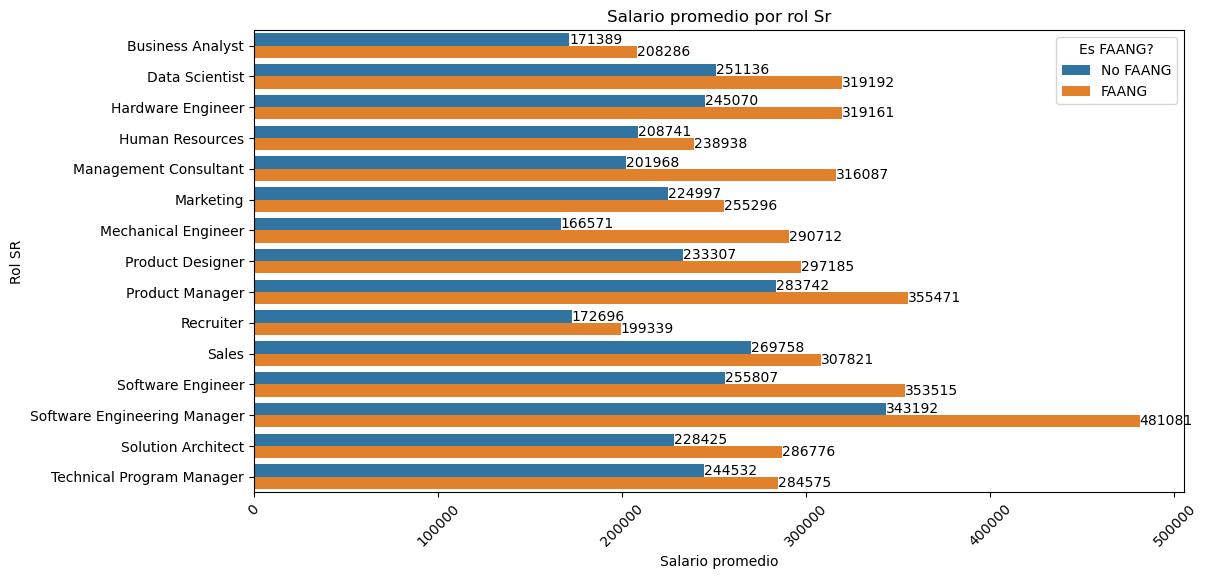

In [52]:
# Group mean salary by title and es_faang
mean_salary_by_title = senior_df.groupby(['title', 'es_faang'])['totalyearlycompensation'].mean().reset_index()

# Plot the bar plot with a hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='totalyearlycompensation', y='title', hue='es_faang', data=mean_salary_by_title)

# Customize the plot
ax.set(xlabel='Salario promedio', ylabel='Rol SR', title = 'Salario promedio por rol Sr')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0], size=10)
plt.bar_label(ax.containers[1], size=10)
plt.tight_layout

# Change legends HUE
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No FAANG', 'FAANG'], title='Es FAANG?')



# Display the plot
plt.show()


# Completamente mayores sueldos en FAANG

# CORRELACIONES

Esto se puede observar en el reporte resumen de ydata_profiling. Pero procedo a replicarlo con seaborn para saber cómo crearlo y también ganar flexibilidad para saber qué variables te gustaría analizar

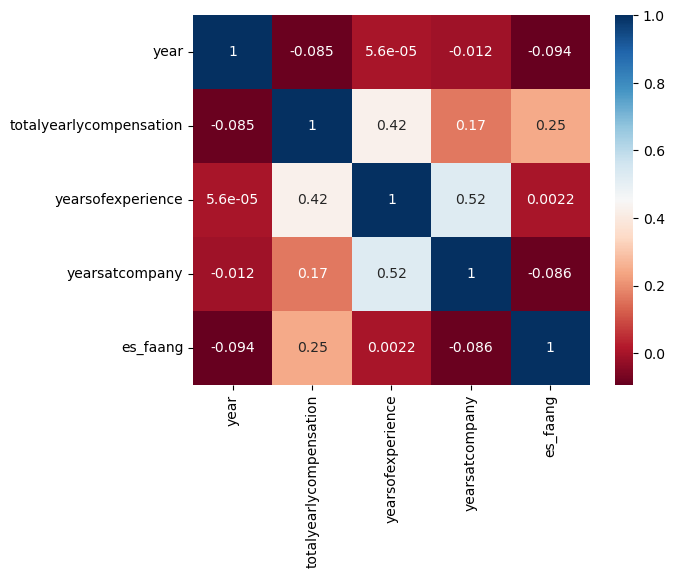

In [54]:
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

In [55]:
full_df = pd.read_csv('../Luigi/salario_data.csv')
full_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

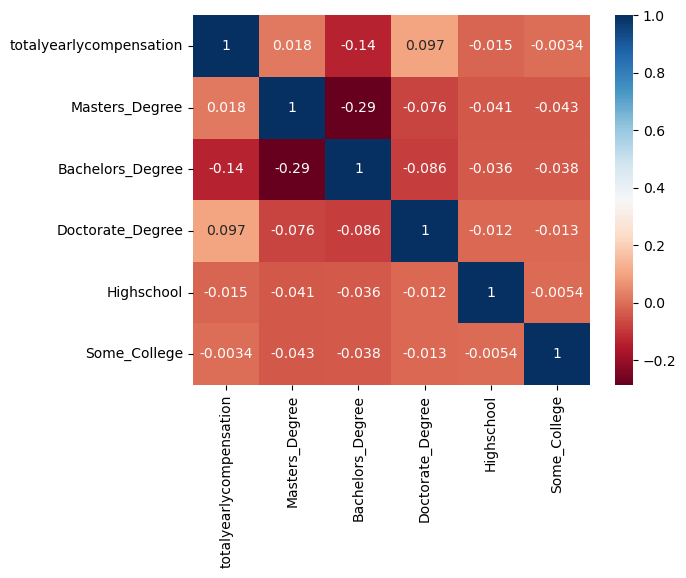

In [56]:
study_df = full_df[['totalyearlycompensation','Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College']]
sns.heatmap(study_df.corr(), cmap='RdBu', annot=True)
plt.show()

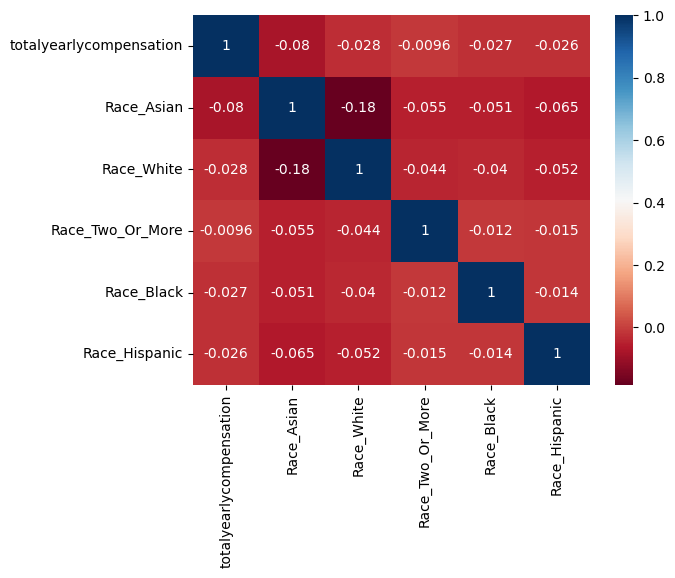

In [57]:
race_df = full_df[['totalyearlycompensation','Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']]
sns.heatmap(race_df.corr(), cmap='RdBu', annot=True)
plt.show()

In [70]:
full_df.corr()['totalyearlycompensation'].sort_values(ascending=False)

totalyearlycompensation    1.000000
stockgrantvalue            0.770756
basesalary                 0.672865
bonus                      0.489454
yearsofexperience          0.422879
dmaid                      0.376346
yearsatcompany             0.165802
Doctorate_Degree           0.097179
Masters_Degree             0.018320
Some_College              -0.003380
Race_Two_Or_More          -0.009623
Highschool                -0.014831
Race_Hispanic             -0.026145
Race_Black                -0.026741
Race_White                -0.027802
Race_Asian                -0.080072
rowNumber                 -0.092622
cityid                    -0.110204
Bachelors_Degree          -0.139866
Name: totalyearlycompensation, dtype: float64